![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

#🔎 Answering Questions on Financial Texts
📜One of the latests biggest outcomes in NLP are **Language Models** and their ability to answer questions, expressed in natural language.

> *While our gross profit margin increased to 81.4% in 2020 from 63.1% in 2019, our revenues declined approximately 27% in 2020...
...
We reported an operating loss of approxiamtely \$8,048,581 million in 2020 as compared to an operating loss of \$7,738,193 in 2019
...*

```
- What is the profit increase?
- What was the decline in revenue?
- What was the operation loss in 2020?
- What was the operation loss in 2019?
```

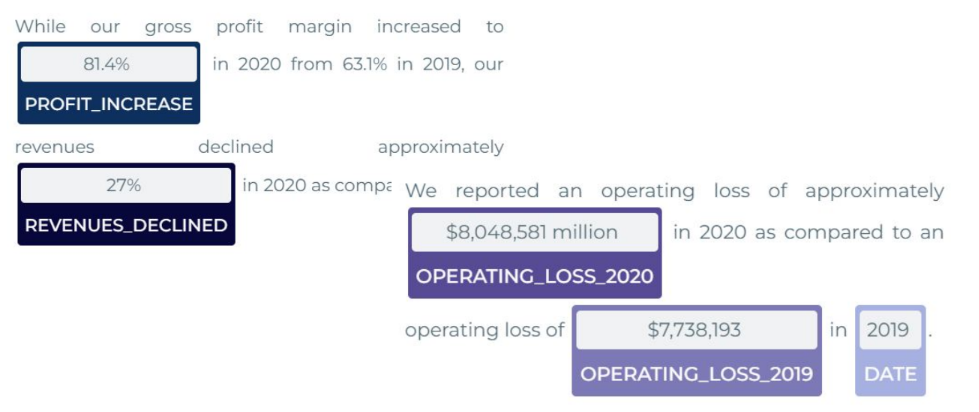

📜

**Question Answeering (QA)** uses specific Language Models trained to carry out **Natural Language Inference (NLI)**

**NLI** works as follows:
- Given a text as a Premise (P);
- Given a hypotheses (H) as a question to be solved;
   - Then, we ask the Language Model is H is `entailed`, `contradicted` or `not related` in P.

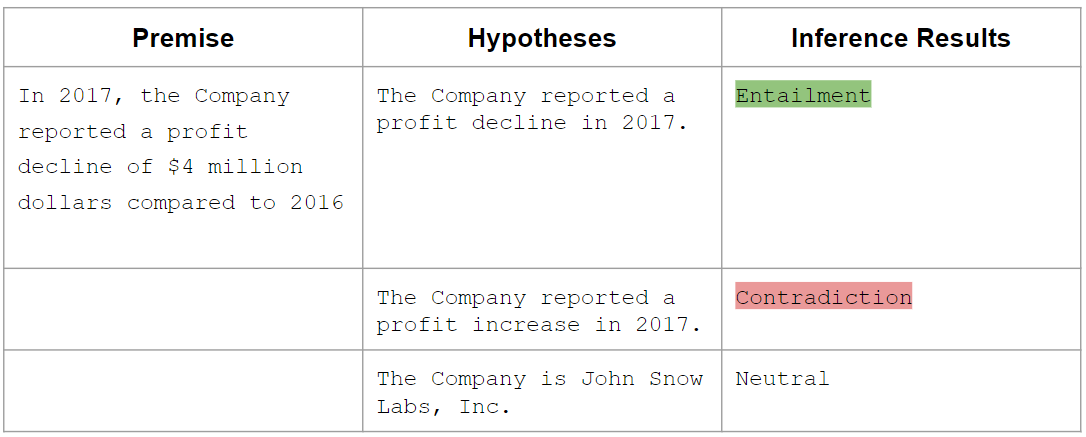

Although we are not getting into the maths of it, it's basically done by using a Language Model to encode P, H and then carry out sentence similarity operations.

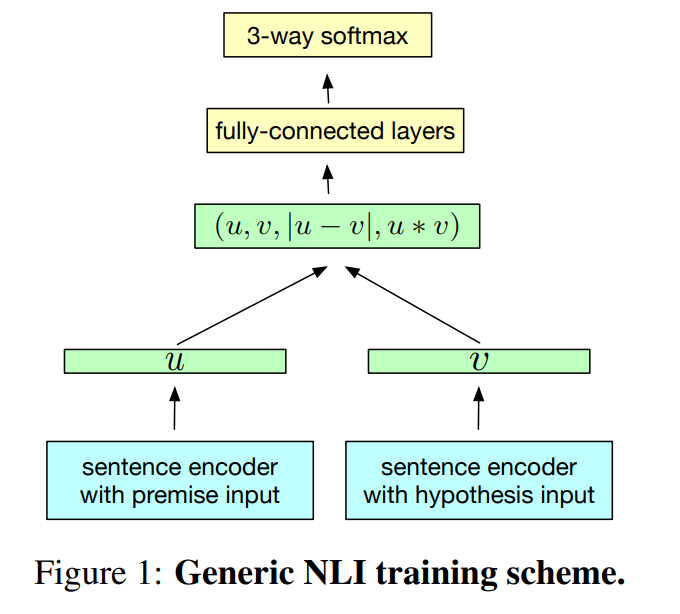

##📌 Applications of NLI: The basics
The most straight-forward, retrieving answers to natural language questions.
  - Type 1: Open-book questions, where you give the text (P) to the model.
  - Type 2: Close-book questions, where you just use the pretrained Language Model capabilities, learn on texts during training time.

##📌 Applications of NLI: Zero-shot
At John Snow Labs, we have developed our own annotators based on NLI, to not only carry out Question Answering, but using QA to:
- Retrieve Entities, also know as Zero-shot NER;
- Retrieve Relations, also known as Zero-shot Relation Extraction;

###✔️ How we achieve Zero-shot NER With QA?
Given a Question Q, for example, `What was the profit increase in 2017?`, and given the text P `In 2017, the Company reported a profit decline of $4 million dollars compared to 2016` we:

- Generate Hypotheses H with the tokens of the text
  - The profit increase in 2017 was 2017: `contradiction`
  - The profit increase in 2017 was Company: `contradiction`
  - The profit increase in 2017 was ...: `contradiction`
  - The profit increase in 2017 was $4: `entailment`
  - The profit increase in 2017 was million: `entailment`

- We check all the H towards P to see if they are `entailed`. If so, we return them as NER entity. If several tokens in a row return `entailed`, we check if they can be part of the same chunk.

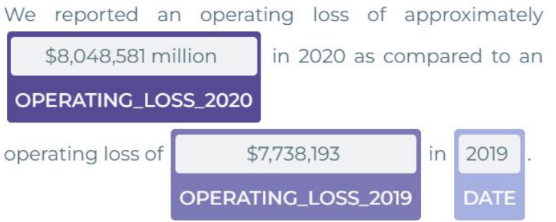

Let's take a look at some examples of applications of QA to Financial Texts.

In [0]:
from johnsnowlabs import nlp, finance

🚨 Your Spark-OCR is outdated, installed==4.3.0 but latest version==4.3.1
You can run nlp.install() to update Spark-OCR

#🔎 Open Book Questions

In [0]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/cdns-20220101.html.txt
dbutils.fs.cp("file:/databricks/driver/cdns-20220101.html.txt", "dbfs:/") 

--2023-02-24 14:47:43-- https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/finance-nlp/data/cdns-20220101.html.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347392 (339K) [text/plain]
Saving to: ‘cdns-20220101.html.txt.1’

cdns-20220101.html. 0%[ ] 0 --.-KB/s cdns-20220101.html. 100%[===================>] 339.25K --.-KB/s in 0.004s 

2023-02-24 14:47:43 (91.6 MB/s) - ‘cdns-20220101.html.txt.1’ saved [347392/347392]

Out[2]: True

In [0]:
with open('/dbfs/cdns-20220101.html.txt', 'r') as f:
  cadence_sec10k = f.read()

Let's take a random piece of text from our 10-K filing...

In [0]:
random_piece = cadence_sec10k[135000:144000]
print(random_piece)

necessary, on commercially reasonable terms or at all and, even if successful, those alternative actions may not allow us to meet our scheduled debt service obligations. The agreement governing our revolving credit facility restricts our ability to dispose of assets and use the proceeds from those dispositions and may also restrict our ability to raise debt or equity capital to be used to repay other indebtedness when it becomes due. We may not be able to consummate those dispositions or to obtain proceeds in an amount sufficient to meet any debt service obligations then due. 
In addition, we conduct a substantial portion of our operations through our subsidiaries, none of which are currently guarantors of our indebtedness. Accordingly, repayment of our indebtedness is dependent on the generation of cash flow by our subsidiaries and their ability to make such cash available to us, by dividend, debt repayment or otherwise. Our subsidiaries do not have any obligation to pay amounts due on our indebtedness or to make funds available for that purpose. Our subsidiaries may not be able to, or may not be permitted to, make distributions to enable us to make payments in respect of our indebtedness. Each subsidiary is a distinct legal entity, and, under certain circumstances, legal and contractual restrictions may limit our ability to obtain cash from our subsidiaries. In the event that we do not receive distributions from our subsidiaries, we may be unable to make required principal and interest payments on our indebtedness.
24
Table of Contents
If we cannot make scheduled payments on our debt, we will be in default and holders of our debt could declare all outstanding principal and interest to be due and payable, the lenders under our revolving credit facility could terminate their commitments to loan money and we could be forced into bankruptcy or liquidation. In addition, a material default on our indebtedness could suspend our eligibility to register securities using certain registration statement forms under SEC guidelines that permit incorporation by reference of substantial information regarding us, potentially hindering our ability to raise capital through the issuance of our securities and increasing our costs of registration.
Despite our current level of indebtedness, we and our subsidiaries may incur substantially more debt. This could further exacerbate the risks to our financial condition described above.
We and our subsidiaries may incur significant additional indebtedness in the future. Although the agreement governing our revolving credit facility contains restrictions on the incurrence of additional indebtedness, these restrictions are subject to a number of qualifications and exceptions, and the additional indebtedness incurred in compliance with these restrictions could be substantial. If we incur any additional indebtedness that ranks equally with the 2024 Notes, then subject to any collateral arrangements we may enter into, the holders of that debt will be entitled to share ratably in any proceeds distributed in connection with any insolvency, liquidation, reorganization, dissolution or other winding up of our company. 
Our variable rate indebtedness subjects us to interest rate risk, which could cause our debt service obligations to increase significantly.
Borrowings under our revolving credit facility are at variable rates of interest and expose us to interest rate risk. If interest rates were to increase, our debt service obligations on our variable rate indebtedness would increase even though the amount borrowed remained the same, and our net income and cash flows, including cash available for servicing our indebtedness, would correspondingly decrease. In the future, we may enter into interest rate swaps that involve the exchange of floating for fixed rate interest payments in order to reduce interest rate volatility. However, we may not maintain interest rate swaps with respect to all of our variable rate ind

Items 2,3, and 5 seem good to ask questions about them!

In [0]:
item2 = """We own land and buildings at our headquarters located in San Jose, California. We also own buildings in India. As of January 1, 2022, the total square footage of our owned buildings was approximately 1,010,000.
We lease additional facilities in the United States and various other countries. We may sublease certain of these facilities where space is not fully utilized."""

item3 = """From time to time, we are involved in various disputes and legal proceedings that arise in the ordinary course of business. These include disputes and legal proceedings related to intellectual property, indemnification obligations, mergers and acquisitions, licensing, contracts, customers, products, distribution and other commercial arrangements and employee relations matters. At least quarterly, we review the status of each significant matter and assess its potential financial exposure. If the potential loss from any claim or legal proceeding is considered probable and the amount or the range of loss can be estimated, we accrue a liability for the estimated loss. Legal proceedings are subject to uncertainties, and the outcomes are difficult to predict. Because of such uncertainties, accruals are based on our judgments using the best information available at the time. As additional information becomes available, we reassess the potential liability related to pending claims and legal proceedings and may revise estimates."""

item5 = """Our common stock is traded on the Nasdaq Global Select Market under the symbol CDNS. As of February 5, 2022, we had 384 registered stockholders and approximately 340,000 beneficial owners of our common stock."""

##🚀 Let's create a pipeline
We will use a `RoBerta` based QA model named `finqa_roberta`

📜To do that, we use in our pipelines:
- a `MultiDocumentAssembler`, which puts together questions (Q to create H) and context (P).
- a BertForQuestionAnswering pretrained model. 

🚀**IMPORTANT: We highly recommend to use `setCaseSensitive(False)` to prevent uppercase to be managed as proper nouns and possibly trigger OOV.**

In [0]:
documentAssembler = nlp.MultiDocumentAssembler()\
  .setInputCols(["question", "context"])\
  .setOutputCols(["document_question", "document_context"])

spanClassifier = nlp.BertForQuestionAnswering.pretrained("finqa_bert","en", "finance/models") \
  .setInputCols(["document_question", "document_context"]) \
  .setOutputCol("answer") \
  .setCaseSensitive(False)

qa_pipeline = nlp.Pipeline().setStages([
  documentAssembler,
  spanClassifier
])

finqa_bert download started this may take some time.
Approximate size to download 389 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][OK!]

In [0]:
P = item2

Q = [
     "Where are the headquarters?",
     "What is the total square footage?",
     "In which countries do they lease facilities?"
]

Q_P = [ [q, P] for q in Q]

example = spark.createDataFrame(Q_P).toDF("question", "context")

example.show()

+--------------------+--------------------+
 question| context|
+--------------------+--------------------+
Where are the hea...|We own land and b...|
What is the total...|We own land and b...|
In which countrie...|We own land and b...|
+--------------------+--------------------+

In [0]:
result = qa_pipeline.fit(example).transform(example)

result.select('question', 'answer.result', 'answer').show(truncate=False)

+--------------------------------------------+-----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
question |result |answer |
+--------------------------------------------+-----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
Where are the headquarters? |[San Jose , California]|[{chunk, 0, 20, San Jose , California, {chunk -> 0, start_score -> 0.8019191, score -> 0.8384219, end -> 20, start -> 17, end_score -> 0.87492466, sentence -> 0}, []}]|
What is the total square footage? |[1 , 010 , 000] |[{chunk, 0, 12, 1 , 010 , 000, {chunk -> 0, start_score -> 0.6659764, score -> 0.7811918, end -> 55, start -> 50, end_score -> 0.8964072, sentence -> 0}, []}] |
In which countries do they lease facilities?|[United States] |[{chunk, 0, 12, United States, {chunk -> 0, start_score -> 0.58890027, score -> 0.52136767, end -> 64, start -> 63, end_score -> 0.45383513, sentence -> 0}, []}] |
+--------------------------------------------+-----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+

In [0]:
P = item5

Q = [
     "Where is their common stock traded?",
     "Which is the trading symbol?"
]

Q_P = [ [q, P] for q in Q]

example = spark.createDataFrame(Q_P).toDF("question", "context")

result = qa_pipeline.fit(example).transform(example)

result.select('question', 'answer.result', 'answer').show(truncate=False)

+-----------------------------------+-----------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
question |result |answer |
+-----------------------------------+-----------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
Where is their common stock traded?|[Nasdaq Global Select Market]|[{chunk, 0, 26, Nasdaq Global Select Market, {chunk -> 0, start_score -> 0.30269942, score -> 0.417215, end -> 21, start -> 16, end_score -> 0.5317306, sentence -> 0}, []}]|
Which is the trading symbol? |[CDNS] |[{chunk, 0, 3, CDNS, {chunk -> 0, start_score -> 0.8779539, score -> 0.84478843, end -> 25, start -> 24, end_score -> 0.811623, sentence -> 0}, []}] |
+-----------------------------------+-----------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

In [0]:
P = item3

Q = [
     "What kind of disputes or legal proceedings related to?"
]

Q_P = [ [q, P] for q in Q]

example = spark.createDataFrame(Q_P).toDF("question", "context")

result = qa_pipeline.fit(example).transform(example)

result.select('question', 'answer.result', 'answer').show(truncate=False)

+------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
question |result |answer |
+------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
What kind of disputes or legal proceedings related to?|[intellectual property , indemnification obligations , mergers and acquisitions , licensing , contracts , customers , products , distribution and other commercial arrangements and employee relations matters]|[{chunk, 0, 204, intellectual property , indemnification obligations , mergers and acquisitions , licensing , contracts , customers , products , distribution and other commercial arrangements and employee relations matters, {chunk -> 0, start_score -> 0.63349146, score -> 0.56178486, end -> 71, start -> 43, end_score -> 0.49007827, sentence -> 0}, []}]|
+------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

#🔎 Automatic Question Generation
Now the question is ... is there a way to generate the questions automatically?

The answer is simple: **YES**, there is!

We have several ways to generate a series of questions, given for examplee:
- A `SUBJECT` of a sentence;
- An `ACTION` (verb);

More specifically, there are three ways:
1. Using the grammatical information (Part of Speech and Dependency Tree);
2. Using NER / Contextual Parser or other method to retrieve SUBJECT and VERB

Check the notebook "Automatic Question Generation" for examples of how to do it.

#🔎 Table Question Answering
For table question answering we have a specific notebok you will find in this workshop. Feel free to check it out too!

But it the meantime, a small spoiler...

#🔎 1. From csv files

Let's create a `csv` file with information about clients and agreements.

In [0]:
import pandas as pd

df_data = { 
    "header" : ['client name', 'last operation year', 'last operation amount', 'document'],
    "rows" : [    
 ['John Smith', '2007', '$200000', 'NDA'],
 ['Jack Gordon', '2017', '$10000',  'Credit Agreement'],
 ['Mary Lean', '2001', '$120000', 'License Agreement'],
 ['Jessica James', '2022', '$1200000', 'Purchase Agreement'],
]
}


df = pd.DataFrame(df_data['rows'], columns=df_data['header'])

df.to_csv('/dbfs/table.csv', index=False)


In [0]:
df_data

Out[15]: {'header': ['client name',
 'last operation year',
 'last operation amount',
 'document'],
 'rows': [['John Smith', '2007', '$200000', 'NDA'],
 ['Jack Gordon', '2017', '$10000', 'Credit Agreement'],
 ['Mary Lean', '2001', '$120000', 'License Agreement'],
 ['Jessica James', '2022', '$1200000', 'Purchase Agreement']]}

In [0]:
df

Out[16]:

client name 
 last operation year 
 last operation amount 
 document 
 
 
 
 
 0 
 John Smith 
 2007 
 $200000 
 NDA 
 
 
 1 
 Jack Gordon 
 2017 
 $10000 
 Credit Agreement 
 
 
 2 
 Mary Lean 
 2001 
 $120000 
 License Agreement 
 
 
 3 
 Jessica James 
 2022 
 $1200000 
 Purchase Agreement

In [0]:
import json
json.dumps(df_data)

Out[17]: '{"header": ["client name", "last operation year", "last operation amount", "document"], "rows": [["John Smith", "2007", "$200000", "NDA"], ["Jack Gordon", "2017", "$10000", "Credit Agreement"], ["Mary Lean", "2001", "$120000", "License Agreement"], ["Jessica James", "2022", "$1200000", "Purchase Agreement"]]}'

Now, some questions...

In [0]:
queries = [
    "Who signed an NDA?",
    "Who operated last time in 2022?", 
    "What is the total amount of operations?",
    "Which year a Credit Agreement was signed?",
]

Now, we will use the following specific components:
- A `MultiDocumentAssembler`, to put together the questions and the table in `json` format
- A `TableAssembler` to assemble the table from a json

In [0]:
data = spark.createDataFrame([
        [json.dumps(df_data), " ".join(queries)]
    ]).toDF("table_json", "questions")

In [0]:
data.show()

+--------------------+--------------------+
 table_json| questions|
+--------------------+--------------------+
{"header": ["clie...|Who signed an NDA...|
+--------------------+--------------------+

In [0]:
document_assembler = nlp.MultiDocumentAssembler() \
    .setInputCols("table_json", "questions") \
    .setOutputCols("document_table", "document_questions")

text_splitter = finance.TextSplitter() \
    .setInputCols(["document_questions"]) \
    .setOutputCol("questions")

table_assembler = nlp.TableAssembler()\
    .setInputCols(["document_table"])\
    .setOutputCol("table")

Last component is `TapasForQuestionAnswering`, which will carry out the inference process

In [0]:
tapas = nlp.TapasForQuestionAnswering.pretrained("table_qa_tapas_base_finetuned_wtq", "en")\
    .setInputCols(["questions", "table"])\
    .setOutputCol("answers")

table_qa_tapas_base_finetuned_wtq download started this may take some time.
Approximate size to download 394.7 MB
[ | ][ / ][ — ][ \ ][ | ][ / ][ — ][ \ ][ | ][ / ][ — ][OK!]

Now the pipeline looks as follows:

In [0]:
pipeline = nlp.Pipeline(stages=[
    document_assembler,
    text_splitter,
    table_assembler,
    tapas
])

And this is the result on fit/transform:

In [0]:
model = pipeline.fit(data)
res = model\
    .transform(data)\
    .selectExpr("explode(answers) AS answer")\
    .select("answer")
res.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
answer |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
{chunk, 0, 10, John Smith, {question -> Who signed an NDA?, aggregation -> NONE, cell_positions -> [0, 0], cell_scores -> 1.0}, []} |
{chunk, 0, 13, Jessica James, {question -> Who operated last time in 2022?, aggregation -> NONE, cell_positions -> [0, 3], cell_scores -> 1.0}, []} |
{chunk, 0, 41, COUNT($200000, $10000, $120000, $1200000), {question -> What is the total amount of operations?, aggregation -> COUNT, cell_positions -> [2, 0], [2, 1], [2, 2], [2, 3], cell_scores -> 1.0, 1.0, 1.0, 1.0}, []}|
{chunk, 0, 4, 2017, {question -> Which year a Credit Agreement was signed?, aggregation -> NONE, cell_positions -> [1, 1], cell_scores -> 1.0}, []} |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

In [0]:
from pyspark.sql import functions as F
res.select("answer.metadata.question", F.expr('answer.result as answer'), F.expr('answer.metadata["aggregation"] as metadata')).show(truncate=False)

+-----------------------------------------+-----------------------------------------+--------+
question |answer |metadata|
+-----------------------------------------+-----------------------------------------+--------+
Who signed an NDA? |John Smith |NONE |
Who operated last time in 2022? |Jessica James |NONE |
What is the total amount of operations? |COUNT($200000, $10000, $120000, $1200000)|COUNT |
Which year a Credit Agreement was signed?|2017 |NONE |
+-----------------------------------------+-----------------------------------------+--------+

#🔎 2. From tables in scanned documents
You will need `Visual NLP`, another licensed product of JSL, to extract tables from documents.

The result will be just a csv, so you can apply the same code exposed above after you extract the table from your documents.

Check the notebook `Financial_Visual_Document_Understanding` for more details. In the meantime, a small spoiler...

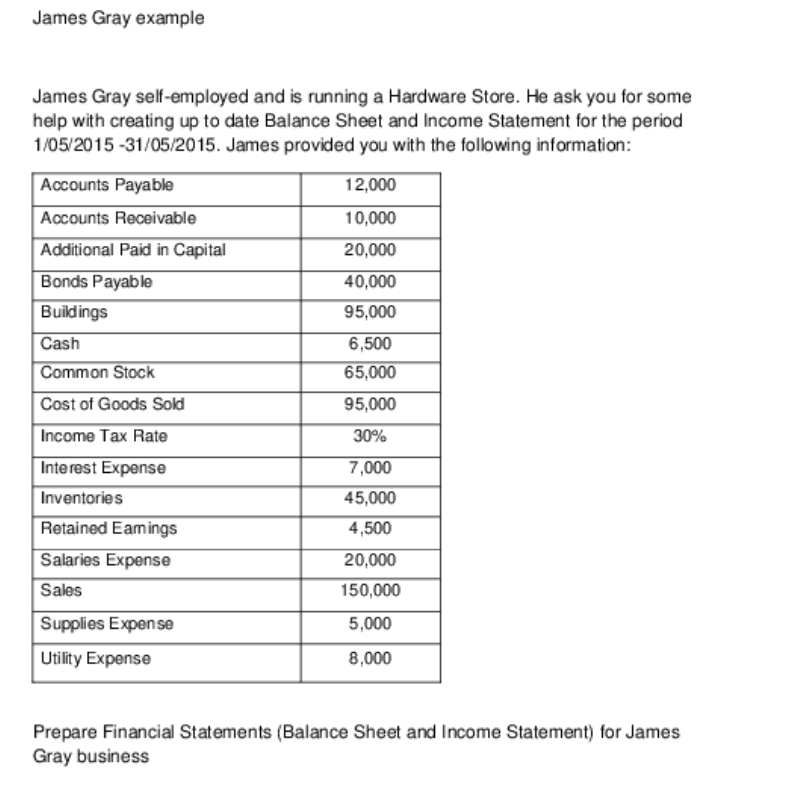

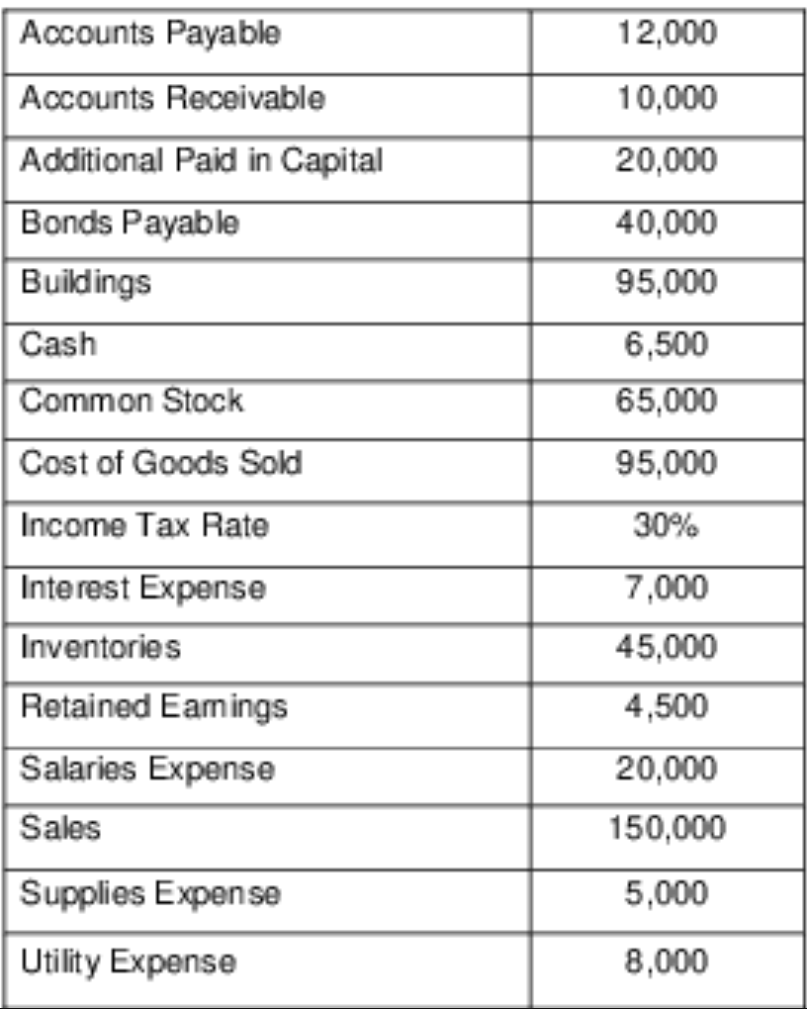

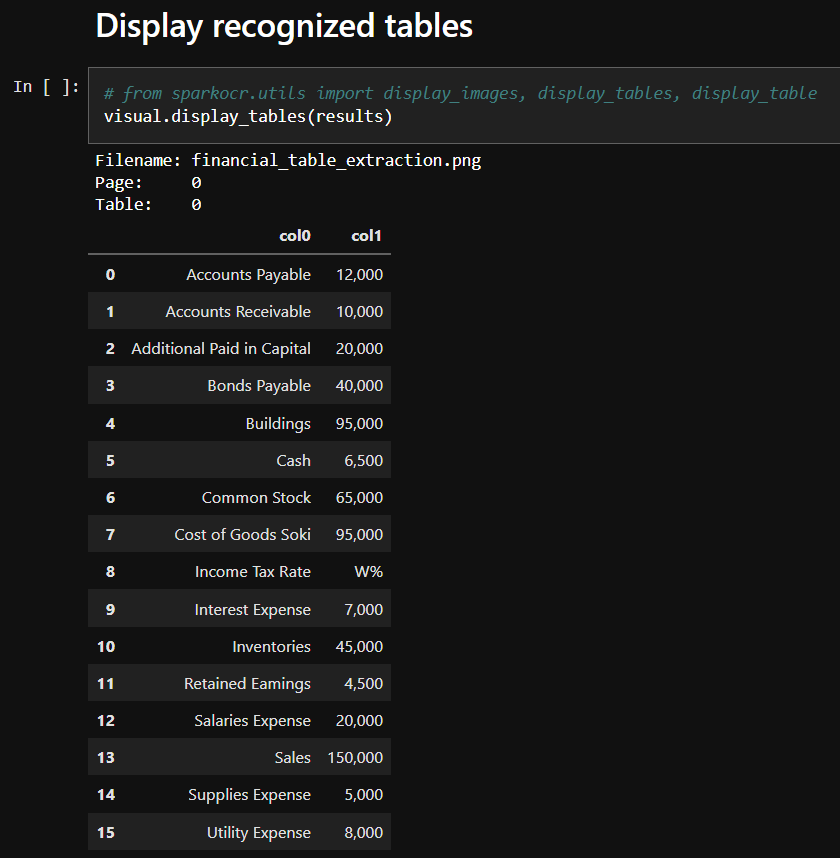